In [19]:
# -*- coding: utf-8 -*- 
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the mems dataset. 
# implemented Averaging Soft Voting tech. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.ensemble import VotingClassifier
import time

# Load mems dataset
df = pd.read_csv('/home/ibibers@ads.iu.edu/IOT/IOT_Datasets/mems_dataset.csv')

# Drop duplicates
df = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value
one_value = df.columns[df.nunique() == 1]
df = df.drop(columns = one_value, axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21563 entries, 0 to 21575
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       21563 non-null  float64
 1   y       21563 non-null  float64
 2   z       21563 non-null  float64
 3   label   21563 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 842.3 KB


In [20]:
# X-axis: Represents acceleration along the horizontal axis.
# Y-axis: Represents acceleration along the vertical axis.
# Z-axis: Represents acceleration along the depth axis.

# labels 
#1. Normal: This label represents the state of the machine when it is operating under normal conditions, without any significant mechanical imbalance or impending failure.
#2. Near-failure: This label indicates that the machine is experiencing conditions that suggest it is close to a failure state. These conditions may include early signs of mechanical imbalance or other issues that could lead to failure if not addressed.
#3. Failure: This label is assigned when the machine has reached a state of failure, where it is no longer functioning as intended due to mechanical issues or other problems.

# Extract subsample of data
print (" Extract subsample of data: ")
print(df['label'].value_counts())

 Extract subsample of data: 
label
1    10955
2     5771
3     4837
Name: count, dtype: int64


In [21]:
dropped_df = ['label']
X = df.drop(dropped_df, axis=1)
y = df['label']


In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Initialize models
start_time = time.time()
model1 = KNeighborsClassifier()
model2 = SVC(kernel='rbf', probability=True)  
model3 = LogisticRegression(solver='lbfgs', multi_class='multinomial')  
model4 = RandomForestClassifier(n_estimators=200, random_state=42)

# Combine models using soft Voting Classifier
ensemble_model = VotingClassifier(estimators=[('knn', model1), ('svm', model2), ('lr', model3) , ('rf' , model4)], voting='soft')

# Train the ensemble model
start_train_time = time.time()
ensemble_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Make predictions on new data (X_test)
start_pred_time = time.time()  
y_pred = ensemble_model.predict(X_test)
pred_time = time.time() - start_pred_time

total_time = time.time() - start_time



In [24]:
print("Time taken for training:{:f} seconds".format(train_time))
print("Time taken for prediction: {:f} seconds".format(pred_time))
print("Total time taken:{:f} seconds".format(total_time))

Time taken for training:28.267007 seconds
Time taken for prediction: 2.519158 seconds
Total time taken:30.787808 seconds


Ensemble Model (Soft Voting) Accuracy: 0.7070644612768588

Ensemble Model (Soft Voting) Classification Report (Rounded):
              precision    recall  f1-score   support

           1       0.69      0.81      0.74      3283
           2       0.77      0.80      0.78      1696
           3       0.65      0.39      0.48      1490

    accuracy                           0.71      6469
   macro avg       0.70      0.66      0.67      6469
weighted avg       0.70      0.71      0.69      6469



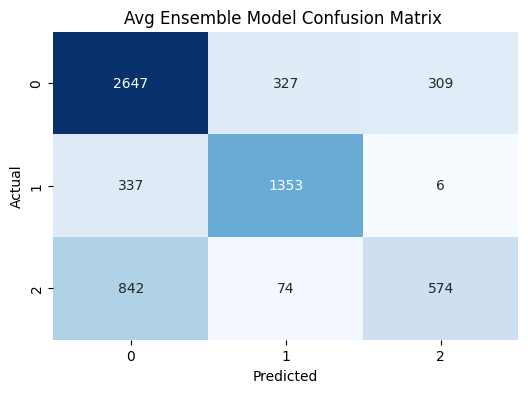

In [25]:
# Evaluate 
accuracy_final_rounded = accuracy_score(y_test, y_pred)
print("Ensemble Model (Soft Voting) Accuracy:", accuracy_final_rounded)

# Classification report
print("\nEnsemble Model (Soft Voting) Classification Report (Rounded):")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm_final_rounded = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_final_rounded, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Avg Ensemble Model Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Ensemble Model (Soft Voting) Accuracy without adding the RF: 0.7049002937084557